In [1]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
from random import sample
import math
from heapq import merge
from random import *
import secrets
from scipy.stats import spearmanr
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
summary_dir = '/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/emobdr_summaries/'
summary_files = [f for f in listdir(summary_dir)]
summary_files

['1nan.csv',
 '2nan.csv',
 '3nan.csv',
 '4nan.csv',
 '5nan.csv',
 '6nan.csv',
 'A100VV1V2XDQI7.csv',
 'A10TYO0H3GLCH6.csv',
 'A14PFRHG0A2YY9.csv',
 'A19CB2C4GY4C60.csv',
 'A1A1A9UHNQCI9Y.csv',
 'A1BHINLXH3E2GJ.csv',
 'A1C57DJF1HCR3Q.csv',
 'A1C59M3HPCO503.csv',
 'A1D4I1QYL9713I.csv',
 'A1DZLZE63NE1ZI.csv',
 'A1FGKIKJYSL1MI.csv',
 'A1GKEEI844CEKI.csv',
 'A1H5BQHY7VOY3I.csv',
 'A1HWI4N1RJGKYY.csv',
 'A1IIUECI2HNG55.csv',
 'A1M1TSMJB12177.csv',
 'A1MTRZDRKNB9GV.csv',
 'A1NHTBY5YB9JH7.csv',
 'A1NIO3JNX5QTN8.csv',
 'A1PJLZSOUQ4MIL.csv',
 'A1SWRO4LMKPCOQ.csv',
 'A1UKZZL7ANOZRZ.csv',
 'A1WGSW0SLN4Y91.csv',
 'A1XAOEDK0Y2KBT.csv',
 'A1Y25W1Y7KDE5.csv',
 'A20HZD952T4B2O.csv',
 'A26L91YL0GDGD8.csv',
 'A26ZENZ5G8AEGM.csv',
 'A27PVIL93ZMY46.csv',
 'A28Q19NTTP0UIQ.csv',
 'A2AAY4VT9L71SY.csv',
 'A2AVFNOKFHQ2ME.csv',
 'A2B338ZP97RA5W.csv',
 'A2F0X4LN9N4O4C.csv',
 'A2FCGEU5RTEWG8.csv',
 'A2GM5BW75YCKKW.csv',
 'A2HM35CWB7IIFM.csv',
 'A2IOT3PCS9G5RK.csv',
 'A2OJ5XOEKTKRR9.csv',
 'A2PEXE95UD6Y5S.csv',
 'A

In [3]:
pt_ls = []

NN_mean = []
EE_mean = []
NE_mean = []
EN_mean = []

for a in summary_files:
    pt_csv = pd.read_csv(summary_dir + a)
    if pt_csv.rho[3] >= 0.75:
        pt_ls.append(a[:-4])
        pt_df = pt_csv[pt_csv["catch_trial"] == "No"]

        #neupt = pt_df[pt_df["valence"] == "neutral"]
        #emopt = pt_df[pt_df["valence"] == "negative"]
        #conpt = pt_df[pt_df["event"] == "cont"]
        #bdrpt = pt_df[pt_df["event"] == "bdry"]

        NNneupt = pt_df[pt_df["condition"] == "boundary"]
        EEemopt = pt_df[pt_df["condition"] == "Negbdr"]
        NEneuemopt = pt_df[pt_df["condition"] == "NeuNeg"]
        ENemoneupt = pt_df[pt_df["condition"] == "NegNeu"]

        NN_trls = []
        EE_trls = []
        NE_trls = []
        EN_trls = []

        for index, row in NNneupt.iterrows():
            if str(NNneupt.slider_response[index]) != 'nan':
                NN_trls.append(abs(NNneupt.dur[index] - NNneupt.slider_response[index]))
        for index, row in EEemopt.iterrows():
            if str(EEemopt.slider_response[index]) != 'nan':
                EE_trls.append(abs(EEemopt.dur[index] - EEemopt.slider_response[index]))
        for index, row in NEneuemopt.iterrows():
            if str(NEneuemopt.slider_response[index]) != 'nan':
                NE_trls.append(abs(NEneuemopt.dur[index] - NEneuemopt.slider_response[index]))
        for index, row in ENemoneupt.iterrows():
            if str(ENemoneupt.slider_response[index]) != 'nan':
                EN_trls.append(abs(ENemoneupt.dur[index] - ENemoneupt.slider_response[index]))

        NN_mean.append(np.mean(NN_trls))
        EE_mean.append(np.mean(EE_trls))
        NE_mean.append(np.mean(NE_trls))
        EN_mean.append(np.mean(EN_trls))

In [4]:
emo_bdr_df = pd.DataFrame({"participant" :pt_ls,
                           "Neu_Neu": NN_mean,
                           "Emo_Emo" : EE_mean,
                           "Neu_Emo" : NE_mean,
                           "Emo_Neu" : EN_mean})

In [5]:
emo_bdr_df.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/r_analysis/abs_emobdr2_bdr.csv')

## graphs

In [6]:
grph_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/r_analysis/abs_emobdr2_bdr.csv')
grph_csv

,Unnamed: 0,participant,Neu_Neu,Emo_Emo,Neu_Emo,Emo_Neu
0,0,3nan,0.266977,0.364026,0.339444,0.375869
1,1,A10TYO0H3GLCH6,0.485602,0.571776,0.401580,0.587021
2,2,A14PFRHG0A2YY9,0.555556,0.518889,0.551885,0.520498
3,3,A1BHINLXH3E2GJ,0.565570,0.545767,0.652650,0.584331
4,4,A1C59M3HPCO503,0.535317,0.498467,0.507567,0.488796
5,5,A1D4I1QYL9713I,0.636877,0.719643,0.713889,0.702500
6,6,A1FGKIKJYSL1MI,0.698621,0.526897,0.492414,0.554943
7,7,A1M1TSMJB12177,0.529000,0.663111,0.473889,0.663333
8,8,A1NIO3JNX5QTN8,0.603640,0.669742,0.585093,0.620785
9,9,A1UKZZL7ANOZRZ,0.383321,0.477077,0.347799,0.550527


In [7]:
mltd_anova = pd.melt(grph_csv, id_vars=['participant'], value_vars=['Neu_Neu', 'Emo_Emo', 'Neu_Emo', 'Emo_Neu'], var_name='condition', value_name='resp')
mltd_anova.head()
mltd_anova.to_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/r_analysis/abs_emobdr2_anova.csv', index=False, encoding='utf-8-sig')

[]

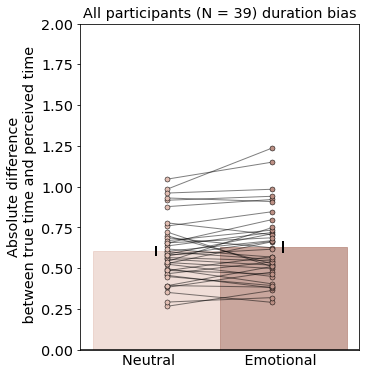

In [8]:
mediumseagreen = '#e2beb3' #light beige
cyan = '#bc9085' #dark beige
totalpts = len(grph_csv)
fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, np.mean(grph_csv.Neu_Neu), width,
    color= mediumseagreen,
    #hatch = '.',
    edgecolor= mediumseagreen,
    alpha = 0.5,
    yerr=stats.sem(grph_csv.Neu_Neu),
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(grph_csv.Emo_Emo)  , width,
    color= cyan,
    #hatch = '.',
    edgecolor= cyan,
    alpha = 0.8,
    yerr=stats.sem(grph_csv.Emo_Emo),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = grph_csv.Neu_Neu
d = grph_csv.Emo_Emo
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=mediumseagreen, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=cyan, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(0, 2)
plt.xlabel("Neutral               Emotional", fontsize = "x-large")
plt.ylabel("Absolute difference\n between true time and perceived time", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) duration bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])


[]

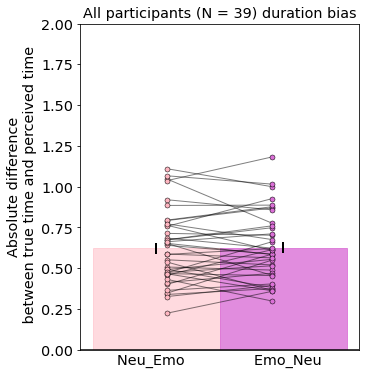

In [9]:
mediumseagreen = '#FFB6C1' #pink
cyan = '#DA70D6' #orchid
totalpts = len(grph_csv)
fig, ax = plt.subplots(figsize=(5, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(1) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, np.mean(grph_csv.Neu_Emo), width,
    color= mediumseagreen,
    #hatch = '.',
    edgecolor= mediumseagreen,
    alpha = 0.5,
    yerr=stats.sem(grph_csv.Neu_Emo),
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width,np.mean(grph_csv.Emo_Neu)  , width,
    color= cyan,
    #hatch = '.',
    edgecolor= cyan,
    alpha = 0.8,
    yerr=stats.sem(grph_csv.Emo_Neu),
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition
h = grph_csv.Neu_Emo
d = grph_csv.Emo_Neu
     # Set up the x-axis values
x1 = i - 0.2
x2 = i + 0.2
line_color = ["black"]
line_colors = np.repeat(line_color, len(d))
alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
for hi, di, ci, ai in zip(h, d, line_colors, alphas):
    ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
ax.scatter(len(h)*[x1+0.03], h, c=mediumseagreen, edgecolors= "black",
s=25, lw=0.5, zorder=10)
ax.scatter(len(d)*[x2-0.08], d, c=cyan, edgecolors= "black",
s=25, lw=0.5, zorder=10)
#ax.legend(loc = 'lower left', fontsize = "large")

# Fix the axes and labels 
#legend_elements = []
plt.ylim(0, 2)
plt.xlabel("Neu_Emo               Emo_Neu", fontsize = "x-large")
plt.ylabel("Absolute difference\n between true time and perceived time", fontsize = "x-large")
plt.yticks(fontsize = "x-large")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
plt.title("All participants (N = %s) duration bias"%totalpts, fontsize = "x-large")
#plt.legend(handles=legend_elements, loc='center')
ax.xaxis.set_tick_params(labelbottom=False)
ax.set_xticks([])


## ANOVA graph

In [2]:
grph_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/r_analysis/abs_emobdr2_anova.csv')
#grph_csv = pd.read_csv('/Users/ayesh/Desktop/Gradstuff/duration_judgement/summary/mturk_summary/r_analysis/emo_bdr.csv')

In [3]:
grph_csv

,participant,condition,resp,prior,post,switch
0,3nan,Neu_Neu,0.266977,neutral,neutral,per
1,A10TYO0H3GLCH6,Neu_Neu,0.485602,neutral,neutral,per
2,A14PFRHG0A2YY9,Neu_Neu,0.555556,neutral,neutral,per
3,A1BHINLXH3E2GJ,Neu_Neu,0.565570,neutral,neutral,per
4,A1C59M3HPCO503,Neu_Neu,0.535317,neutral,neutral,per
...,...,...,...,...,...,...
151,A9WIOFVRSYW3L,Emo_Neu,0.361539,emotional,neutral,per_val
152,AKX5RHHO8BIUX,Emo_Neu,0.454981,emotional,neutral,per_val
153,AML72HK5V5OP0,Emo_Neu,0.858142,emotional,neutral,per_val
154,ATHS9GUME1XCA,Emo_Neu,0.887137,emotional,neutral,per_val


In [9]:
N_N = grph_csv.loc[grph_csv["condition"] == 'Neu_Neu']
E_E = grph_csv.loc[grph_csv["condition"] == 'Emo_Emo']
N_E = grph_csv.loc[grph_csv["condition"] == 'Neu_Emo']
E_N = grph_csv.loc[grph_csv["condition"] == 'Emo_Neu']

pers_mean = [np.mean(N_N["resp"]), np.mean(E_E["resp"])]
pv_mean = [np.mean(N_E["resp"]), np.mean(E_N["resp"])]
pers_sems = [stats.sem(N_N["resp"]), stats.sem(E_E["resp"])]
pv_sems = [stats.sem(N_E["resp"]), stats.sem(E_N["resp"])]

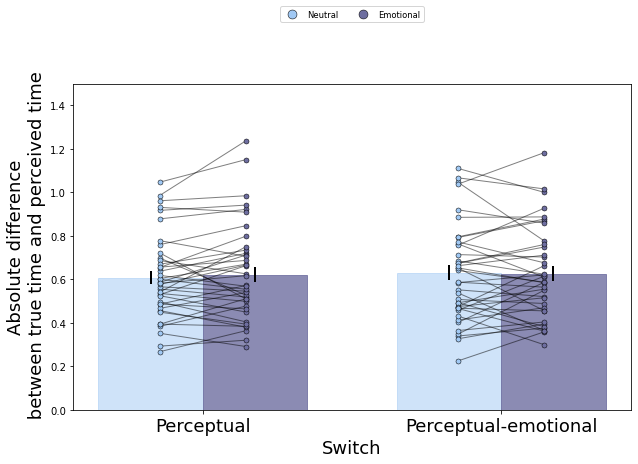

In [15]:
light = '#a1c9f4'
dark = '#6e6ea0'

totalpts = len(grph_csv)
fig, ax = plt.subplots(figsize=(10, 6))

##################
#BAR GRAPHS
##################
## necessary variables
ind = np.arange(2) # the x locations for the groups
width = 0.35 # the width of the bars
#source-corrected bias bars
ax.bar(ind, pers_mean, width,
    color= light,
    #hatch = '.',
    edgecolor= light,
    alpha = 0.5,
    yerr=pers_sems,
    label = "Safe",
    error_kw=dict(elinewidth=2,ecolor= "black"))
ax.bar(ind+width, pv_mean, width,
    color= dark,
    #hatch = '.',
    edgecolor= dark,
    alpha = 0.8,
    yerr= pv_sems,
    label = "Threat",
    error_kw=dict(elinewidth=2,ecolor= "black"))

#ax.legend()

##################
#SCATTERPLOT GRAPHS
##################
exps2 = []
#i = 1.0
i = 0.2

     # Get the values for same_context and bound_context bias in each valence condition

for one_exp, subdf in grph_csv.groupby('switch'):
    exps2.append(one_exp)
     # Get the values for same_context and bound_context bias in each valence condition
    h = subdf.query('prior == "neutral"')['resp'].values
    d = subdf.query('prior == "emotional"')['resp'].values
     # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
    line_color = ["black"]
    line_colors = np.repeat(line_color, len(d))
    alphas = [0.5]*len(line_colors)

     # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1 + 0.03, x2 - 0.08], [hi, di], c=ci, alpha=ai, linewidth = 1)

        # Plot the points
        # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1+0.03], h, c=light, edgecolors= "black",
    s=25, lw=0.5, label='Neutral', zorder=10)
    ax.scatter(len(d)*[x2-0.08], d, c=dark, edgecolors= "black",
    s=25, lw=0.5, label='Emotional', zorder=10)
 # Update x-axis
    i += 1

# Fix the axes and labels 
# Fix the axes and labels 
lbls = ['Perceptual', 'Perceptual-emotional'] #adjust for exp1, insert 'Non-overlapping pairs (XY)'
ax.set_ylim(0,1.5)
ax.set_xticks([0.175, 1.175]) #width/2
_ = ax.set_xticklabels(lbls, fontsize='18')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
                fontsize='small',
                loc='upper center',
                bbox_to_anchor=(0.5, 1.25),
                ncol=2,
                scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Switch', fontsize = 18)
ax.set_ylabel('Absolute difference\n between true time and perceived time', fontsize =18)

ax.patch.set_edgecolor('white')  

ax.patch.set_linewidth('0')

#legend_elements = []
plt.savefig('emobdr_Anova.pdf')